In [ ]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from functools import partial

import tensorflow as tf
AUTO = tf.data.experimental.AUTOTUNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
images = glob('.\\Topic_5_Data\\ISIC84by84\\train\\*\\*.jpg')
df = pd.DataFrame({'path': images})
df['label'] = df['path'].str.split('\\', expand=True)[4]
# class_names=['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']
# dict_classes={0:'AK', 1:'BCC', 2:'BKL',3:'DF',4:'NV',5:'VASC',6:'MEL',7:'SCC'}
dict_classes={'AK':0,'BCC':1,'BKL':2,'DF':3,'NV':4,'VASC':5,'MEL':6,'SCC':7}
labels=df['label'].values
bin=[]
for label in labels:
    bin.append(dict_classes[label])
df['bin']=bin
df.head()

,path,label,bin
0,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002446...,AK,0
1,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002447...,AK,0
2,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002451...,AK,0
3,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002464...,AK,0
4,.\Topic_5_Data\ISIC84by84\train\AK\ISIC_002465...,AK,0


In [ ]:
# np.unique(df['label'])
df['label'].value_counts()

NV      12775
MEL      4422
BCC      3223
BKL      2524
AK        735
SCC       528
VASC      153
DF        139
Name: label, dtype: int64

[12775  4422  3223  2524   735   528   153   139]
Index(['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF'], dtype='object')


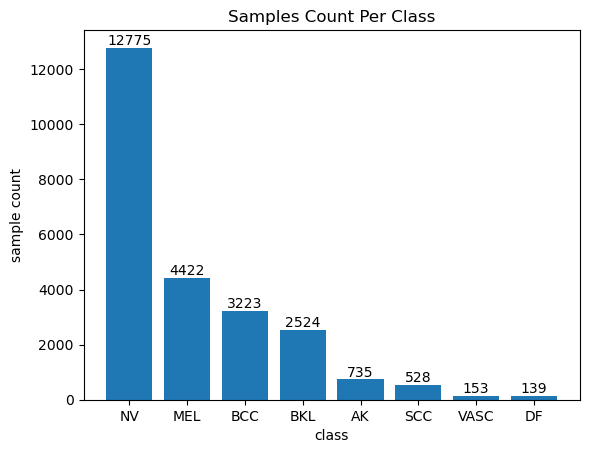

In [ ]:
# visualization of classes images count

x = df['label'].value_counts()
print(x.values)
print(x.index)
fig, ax = plt.subplots()
plt.bar(x.index, x.values, width=0.8)
plt.title('Samples Count Per Class')
plt.xlabel('class')
plt.ylabel('sample count')
plt.bar_label(ax.containers[0], labels=x.values)
plt.show()

In [ ]:
#compute class weight

def get_weight():
    # print('evaluate folder ', path)
    dict_counts = dict(df['label'].value_counts())
    labels = list(dict_counts.keys())
    num_class = len(labels)
    print(num_class,'classes found')
    print(labels)
    print('\nclass',':' ,'files')
    print(df['label'].value_counts())
    total = sum(dict_counts.values())
    dict_weights = {}
    print('\nclass',':' ,'weight')
    for label in labels:
        value = round(total/(num_class*dict_counts[label]), 5)
        key = dict_classes[label]
        dict_weights[key]=value
        print(label,'-> ',key,':',value)
    return dict_weights

#dict_classes={'AK':0,'BCC':1,'BKL':2,'DF':3,'NV':4,'VASC':5,'MEL':6,'SCC':7}
classes=df['label'].unique()
dict_counts = dict(df['label'].value_counts()) 
#['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF']
dict_weights = get_weight()
print(dict_weights)




8 classes found
['NV', 'MEL', 'BCC', 'BKL', 'AK', 'SCC', 'VASC', 'DF']

class : files
NV      12775
MEL      4422
BCC      3223
BKL      2524
AK        735
SCC       528
VASC      153
DF        139
Name: label, dtype: int64

class : weight
NV ->  4 : 0.23972
MEL ->  6 : 0.69253
BCC ->  1 : 0.95016
BKL ->  2 : 1.2133
AK ->  0 : 4.1665
SCC ->  7 : 5.79995
VASC ->  5 : 20.01552
DF ->  3 : 22.03147
{4: 0.23972, 6: 0.69253, 1: 0.95016, 2: 1.2133, 0: 4.1665, 7: 5.79995, 5: 20.01552, 3: 22.03147}


In [ ]:
# check image.shape 

train_data_dir='.\\Topic_5_Data\\ISIC84by84\\train\\*'
# class_='.\\Topic_5_Data\\ISIC84by84\\train\\DF'
list_classes=list(glob(train_data_dir))

import PIL.Image
dict_exception={}
def_res = '(84, 84)'
for class_ in list_classes:
    print()
    class_name = class_.split('\\')[4]
    print(class_name, end=',')
    count = len(glob(class_+'\\*.jpg'))
    list_temp=[]
    for i in range(count):
        # idx = np.random.randint(0, count)
        # print(str(PIL.Image.open(glob(class_+'\\*.jpg')[i]).size))
        str_compare = str(PIL.Image.open(glob(class_+'\\*.jpg')[i]).size)
        if str_compare != def_res:
            list_temp.append(str(glob(class_+'\\*.jpg')[i]))
            print(glob(class_+'\\*.jpg')[i])
    dict_exception[class_name]=list_temp




AK,
BCC,
BKL,
DF,
MEL,
NV,
SCC,
VASC,

In [ ]:
# random pick images for tests

import PIL.Image

def rand_pick(range_):
    train_data_dir='.\\Topic_5_Data\\ISIC84by84\\train\\*'
    list_classes=list(glob(train_data_dir))
    dict_rand={}
    for class_ in list_classes:
        # print()
        class_name = class_.split('\\')[4]
        # print(class_name, end=',')
        count = len(glob(class_+'\\*.jpg'))
        list_temp=[]
        for i in range(range_):
            # idx = np.random.randint(0, len(glob(class_+'\\*')))       
            idx = np.random.randint(0, count)
            # print(str(PIL.Image.open(glob(class_+'\\*.jpg')[idx]).size), end=',')
            str_temp = str(glob(class_+'\\*.jpg')[idx])
            # print(str_temp, end=',')
            list_temp.append(str_temp)
            # print(type(str(PIL.Image.open(str(glob(class_+'\\*')[10])).size)), end=',')
        dict_rand[class_name]=list_temp
    return dict_rand

dict_=rand_pick(1)
# print(dict_.values())

for path_ in dict_.values():
    print(path_[0], end=',')
    print(str(PIL.Image.open(path_[0]).size))



.\Topic_5_Data\ISIC84by84\train\AK\ISIC_0069769.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\BCC\ISIC_0060093.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\BKL\ISIC_0056699.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\DF\ISIC_0054702.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\MEL\ISIC_0032331.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\NV\ISIC_0025998.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0033084.jpg,(84, 84)
.\Topic_5_Data\ISIC84by84\train\VASC\ISIC_0027856.jpg,(84, 84)


AK count 0
BCC count 0
BKL count 375


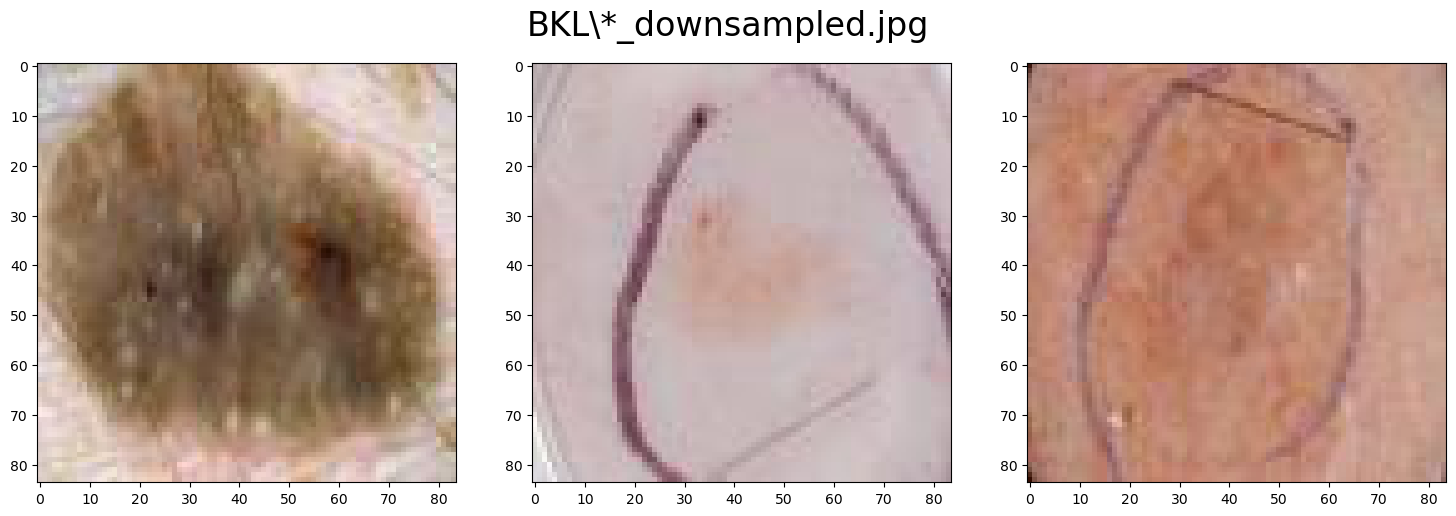

DF count 0
MEL count 371


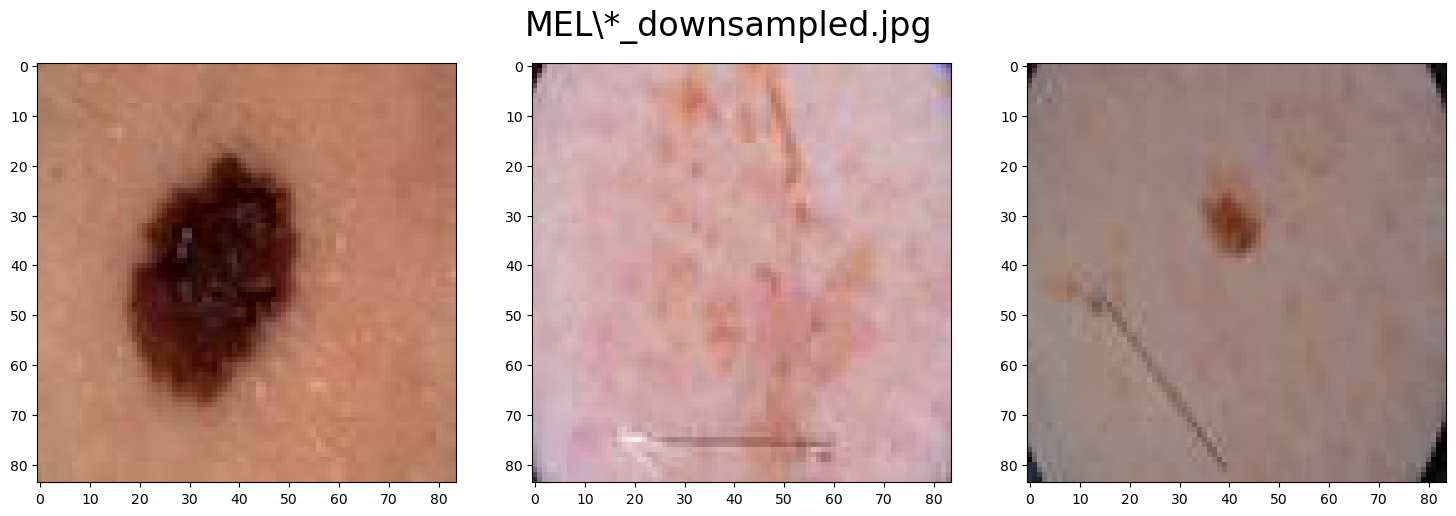

NV count 1304


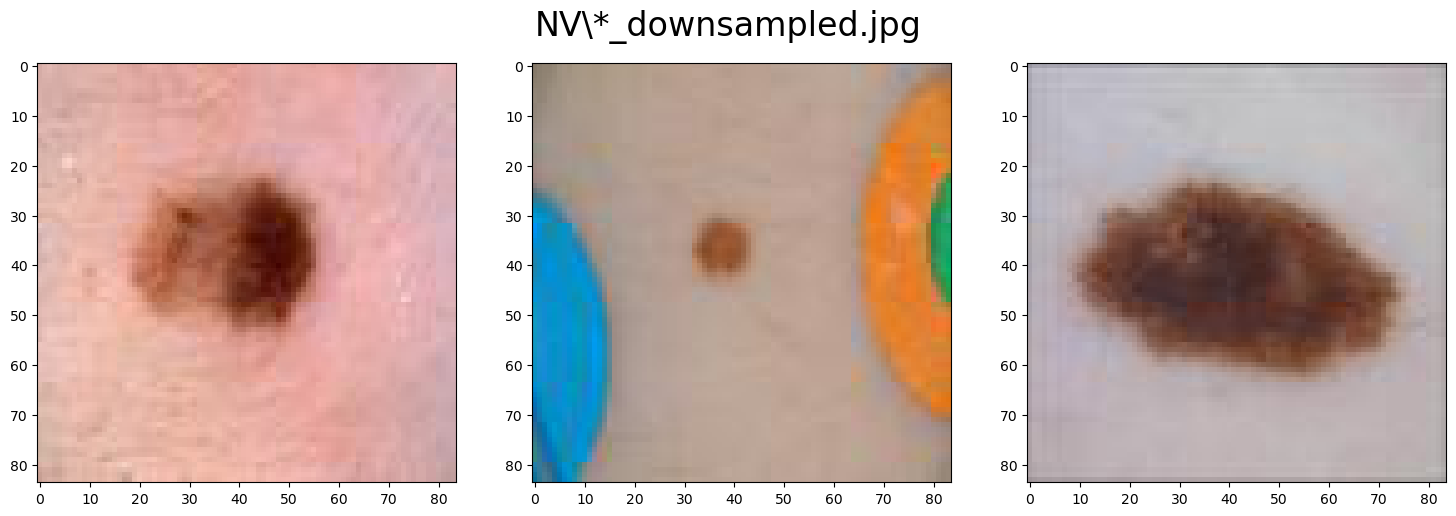

SCC count 0
VASC count 0
{'AK': 0, 'BCC': 0, 'BKL': 375, 'DF': 0, 'MEL': 371, 'NV': 1304, 'SCC': 0, 'VASC': 0}


In [ ]:
# review images file name with '*downsampled*.jpg'

train_data_dir='.\\Topic_5_Data\\ISIC84by84\\train\\*'
list_classes=list(glob(train_data_dir))
dict_down={}
for class_ in list_classes:
    # list_temp=[]
    # print()
    class_name = class_.split('\\')[4]
    # print(class_name, end=',')
    list_idx = glob(class_+'\\*_downsampled.jpg')
    count = len(list_idx)
    print(class_name, 'count', count)
    # print(count)
    dict_down[class_name]=count
    i=0
    if count>2:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'{class_name}\\*_downsampled.jpg', fontsize=24)
        idx = np.random.randint(0, count)
        idx = list_idx[idx]
        # print(idx)
        # data = df.iloc[idx]
        # img_path = data[0]
        # img = np.array(Image.open(img_path))
        img = np.array(Image.open(idx))
        ax[i].imshow(img)
        # ax.imshow(img)
        i+=1
        idx = np.random.randint(0, count)
        idx = list_idx[idx]
        img = np.array(Image.open(idx))
        ax[i].imshow(img)
        i+=1
        idx = np.random.randint(0, count)
        idx = list_idx[idx]
        img = np.array(Image.open(idx))
        ax[i].imshow(img)
        plt.tight_layout()
        plt.show()
print(dict_down)


In [ ]:
# image to rgb

def img_decoder(path, label=None):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [84, 84])
    img = tf.cast(img, tf.float32) / 255.0
    if label == None:
        return img
    return img, label

In [ ]:
dict_=rand_pick(1)
path_ = list(dict_.values()) 
path_=path_[0][0]
path_
print(img_decoder(path_, label=None))

tf.Tensor(
[[[0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.00392157 0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.00784314 0.        ]
  [0.         0.00784314 0.        ]
  [0.         0.00392157 0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.00392157 0.        ]
  [0.         0.00392157 0.        ]
  [0.         0.00392157 0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0